Objective
Regression 
This is a dataset containing over 21613 houses and their characteristics. The goal is to find the best model to predict a house’s price. 

 

1. Explore this dataset using what you have learned in data preprocessing and data visualization 

2. Write a paragraph selecting the most important features (feature selection). 

3. Split your dataset into a training set and a testing set. 

4. Apply linear regression to your training set. 

5. Plot the linear regression. 

5. Measure the performance of linear regression using the testing set. 

6. Apply multiple-linear regression and compare it to the linear model. 

7. Apply polynomial regression and compare it to linear and multilinear regression. 

Note: Every result has to be interpreted and justified. Write your interpretations in a markdown

Import all the necessary Libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [159]:
house = pd.read_csv("C:\\Users\\VALUESEED\\Downloads\\kc_house_data (1).csv")

In [160]:
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [161]:
#Checking for missing values
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [162]:
# Exploring individual columns to differentiate numerical from categorical data
house["waterfront"].unique() #this is a categorical column 

array([0, 1], dtype=int64)

In [163]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [164]:
house["waterfront"].nunique()

2

In [165]:
house["floors"].nunique()

6

In [166]:
new_house = house[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors","waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "lat", "long", "sqft_lot15", "price"]]

In [167]:
new_house

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1287,400000.0


In [168]:
new_house["sqft_living"].nunique()

1038

In [169]:
new_house["sqft_lot"].nunique()

9782

In [170]:
new_house[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors","waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "lat", "long", "sqft_lot15", "price"]].nunique()

bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
lat              5034
long              752
sqft_lot15       8689
price            4028
dtype: int64

# labelling columns 

bedrooms is categorical         
bathrooms is categorical     
sqft_living is numerical   
sqft_lot  is numerical      
floors    is categorical         
waterfront is categorical     
view       is categorical         
condition  is categorical       
grade      is categorical        
sqft_above  is numerical       
sqft_basement  is numerical   
yr_built     is categorical      
yr_renovated  is categorical     
lat     is numerical     
long    is numerical       
sqft_lot15 is numerical     
price  is numerical


In [171]:
#splitting out data into train and test split
x= house[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors","waterfront", "view", "condition", 
        "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "lat", "long", "sqft_lot15", "price"]]

y= house["price"]

In [172]:
np.array(x)
np.array(y)

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [173]:
x = np.array(x)
y = np.array(y)

In [174]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = .2)

In [175]:
len(x_train) == len(y_train)

True

In [176]:
sc = StandardScaler()
sc

StandardScaler()

In [177]:
sc = StandardScaler()
trans = sc.fit_transform(x)

In [178]:
trans

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.30607896,
        -0.26071541, -0.86671733],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.74634143,
        -0.18786773, -0.00568792],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.13565477,
        -0.17237524, -0.98084935],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -0.39414129, -0.37586519],
       [-0.39873715,  0.50022075, -0.52252773, ...,  1.02891048,
        -0.42051149, -0.38158814],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -0.41794772, -0.58588173]])

In [179]:
pd.DataFrame(trans)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.260715,-0.866717
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.187868,-0.005688
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,-0.172375,-0.980849
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.284522,0.174090
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.192849,-0.081958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,1.004958,-0.938069,-0.412381,-0.490545
21609,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,-0.356180,-1.051685,-0.203946,-0.381588
21610,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,0.247888,-0.604321,-0.394141,-0.375865
21611,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.184414,1.028910,-0.420511,-0.381588


In [180]:
pd.DataFrame(trans[:,-1])

,0
0,-0.866717
1,-0.005688
2,-0.980849
3,0.174090
4,-0.081958
...,...
21608,-0.490545
21609,-0.381588
21610,-0.375865
21611,-0.381588


In [181]:
#transforming our data using the standard scaler method
sc = StandardScaler()
trans= sc.fit_transform(new_house)

In [182]:
trans_df= pd.DataFrame(trans)
trans_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.260715,-0.866717
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.187868,-0.005688
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,-0.172375,-0.980849
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.284522,0.174090
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.192849,-0.081958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,1.004958,-0.938069,-0.412381,-0.490545
21609,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,-0.356180,-1.051685,-0.203946,-0.381588
21610,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,0.247888,-0.604321,-0.394141,-0.375865
21611,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.184414,1.028910,-0.420511,-0.381588


In [183]:
x = trans_df.iloc[:, :-1]
y = trans_df.iloc[:, -1]

In [184]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = .2)

In [185]:
#building our model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

target = linear_model.predict(x_test)
target

array([-0.52320536,  0.11415376, -1.06932568, ..., -0.70012944,
       -1.26471243, -0.02655873])

In [186]:
print(mean_squared_error(y_test, target))

print(metrics.r2_score(y_test, target))

0.2638135902631346
0.7189557342393618


# Simple Linear Regression section

In [214]:
#using the "sqft_living" to predict price

x_sqft_liv = trans_df.iloc[:, 2]# picking all the rows and index 2
y_sqft_liv = trans_df.iloc[:, -1] # picking all the rows and column on index -1

In [215]:
x_train_liv, x_test_liv, y_train_liv, y_test_liv = train_test_split(x_sqft_liv, y_sqft_liv, test_size = .2)

In [216]:
x_train_liv = np.array(x_train).reshape(-1,1)
x_test_liv = np.array(x_test).reshape(-1,1)

In [217]:
#building our model - Simple Linear Regression model btw sqft_

Ken = LinearRegression()
Ken.fit(x_train, y_train)

target = Ken.predict(x_test)

In [218]:
print("MSE:", mean_squared_error (y_test_liv, target))
print("R squared:", metrics.r2_score(y_test_liv, target)) 

MSE: 1.884648627822873
R squared: -0.6236480840896081


In [219]:
#using the "sqft_lot" to predict price
x_sqft_lot = trans_df.iloc[:, 3]
y_sqft_lot = trans_df.iloc[:, -1]

In [220]:
x_train_lot, x_test_lot, y_train_lot, y_test_lot= train_test_split(x_sqft_lot, y_sqft_lot, test_size = .2)

In [221]:
x_train_lot = np.array(x_train_lot).reshape(-1,1)
x_test_lot = np.array(x_test_lot).reshape(-1,1)

In [222]:
Ken = LinearRegression()
Ken.fit(x_train_lot, y_train_lot)

target = Ken.predict(x_test_lot)

In [223]:
print("MSE:", mean_squared_error (y_test_lot, target))
print("R squared:", metrics.r2_score(y_test_lot, target)) 

MSE: 0.9881153719995245
R squared: 0.008938112233254358


In [224]:
#using the "floors" to predict price

x_floor = trans_df.iloc[:, 4]
y_floor = trans_df.iloc[:, -1]

# Building Model for Linear Regression

In [235]:
# using the "floors" to predict price

x_floors = trans_df.iloc[:, 4]
y_floors = trans_df.iloc[:, -1]

x_train_floors, x_test_floors, y_train_floors, y_test_floors= train_test_split(x_floors, y_floors, test_size = .2)

x_train_floors = np.array(x_train_floors).reshape(-1,1)
x_test_floors = np.array(x_test_floors).reshape(-1,1)
y_train_floors = np.array(y_train_floors).reshape(-1,1)
y_test_floors =  np.array(y_test_floors).reshape(-1,1)

Ken = LinearRegression()
Ken.fit(x_train_floors, y_train_floors)

target = Ken.predict(x_test_floors)

print("MSE:", mean_squared_error (y_test_floors, target))
print("R squared:", metrics.r2_score(y_test_floors, target))

MSE: 0.9438019080715437
R squared: 0.07159767244800763


In [226]:
sc =StandardScaler()

In [227]:
x_train_floors=sc.fit_transform(x_train_floors)
y_train_floors=sc.fit_transform(y_train_floors)

In [228]:
lin_reg=LinearRegression()

In [229]:
lin_reg.fit(x_train_floors, y_train_floors)

LinearRegression()

In [230]:
print("Intercept constant for our linear model:", lin_reg.intercept_)
print("coefficient of x for our linear model:", lin_reg.coef_)

Intercept constant for our linear model: [-7.42962011e-19]
coefficient of x for our linear model: [[0.25830438]]


In [232]:
y_predict = lin_reg.predict(x_train_floors)

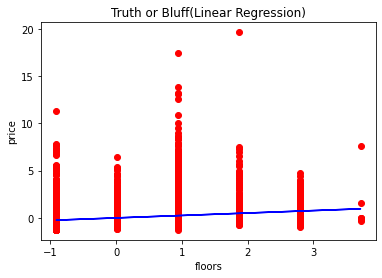

In [233]:
plt.scatter(x_train_floors, y_train_floors, color = "red")
plt.plot(x_train_floors, y_predict, color = "blue")
plt.title("Truth or Bluff(Linear Regression)")
plt.xlabel("floors")
plt.ylabel("price")
plt.show()

In [132]:
#using the "condition" to predict price

x_condition = trans_df.iloc[:, 7]
y_condition = trans_df.iloc[:, -1]

x_train_condition, x_test_condition, y_train_condition, y_test_condition = train_test_split(x_condition, y_condition, test_size = .2)

x_train_condition = np.array(x_train_condition).reshape(-1,1)
x_test_condition = np.array(x_test_condition).reshape(-1,1)

Ken = LinearRegression()
Ken.fit(x_train_condition, y_train_condition)

target = Ken.predict(x_test_condition)

print("MSE:", mean_squared_error (y_test_condition, target))
print("R squared:", metrics.r2_score(y_test_condition, target)) 

MSE: 0.9861672148599929
R squared: -0.0011506788006589996


In [133]:
#using the "grade" to predict price

x_grade = trans_df.iloc[:, 8]
y_grade = trans_df.iloc[:, -1]

x_train_grade, x_test_grade, y_train_grade, y_test_grade = train_test_split(x_grade, y_grade, test_size = .2)

x_train_grade = np.array(x_train_grade).reshape(-1,1)
x_test_grade = np.array(x_test_grade).reshape(-1,1)

Ken = LinearRegression()
Ken.fit(x_train_grade, y_train_grade)

target = Ken.predict(x_test_grade)

print("MSE:", mean_squared_error (y_test_grade, target))
print("R squared:", metrics.r2_score(y_test_grade, target)) 

MSE: 0.5265647328244067
R squared: 0.43276087804883634


In [134]:
#using the "sqft_above" to predict price

x_sqft_above = trans_df.iloc[:, 9]
y_sqft_above = trans_df.iloc[:, -1]

x_train_sqft_above, x_test_sqft_above, y_train_sqft_above, y_test_sqft_above = train_test_split(x_sqft_above, y_sqft_above, test_size = .2)

x_train_sqft_above = np.array(x_train_sqft_above).reshape(-1,1)
x_test_sqft_above = np.array(x_test_sqft_above).reshape(-1,1)

Ken = LinearRegression()
Ken.fit(x_train_sqft_above, y_train_sqft_above)

target = Ken.predict(x_test_sqft_above)

print("MSE:", mean_squared_error (y_test_sqft_above, target))
print("R squared:", metrics.r2_score(y_test_sqft_above, target)) 

MSE: 0.610156855454685
R squared: 0.3783333095275633


In [135]:
x_floors

0       -0.915427
1        0.936506
2       -0.915427
3       -0.915427
4       -0.915427
           ...   
21608    2.788439
21609    0.936506
21610    0.936506
21611    0.936506
21612    0.936506
Name: 4, Length: 21613, dtype: float64

In [136]:
y_floors

0       -0.866717
1       -0.005688
2       -0.980849
3        0.174090
4       -0.081958
           ...   
21608   -0.490545
21609   -0.381588
21610   -0.375865
21611   -0.381588
21612   -0.585882
Name: 16, Length: 21613, dtype: float64

In [137]:
x_train_floors, x_test_floors, y_train_floors, y_test_floors  = train_test_split(x_floors, y_floors, test_size = .2)

In [138]:
x_train_floors = np.array(x_train_floors).reshape(-1, 1)
x_test_floors = np.array(x_test_floors).reshape(-1, 1)

In [139]:
floors = LinearRegression()
floors.fit(x_train_floors, y_train_floors)
target = floors.predict(x_test_floors)

In [140]:
target

array([ 2.35935224e-01,  2.35935224e-01,  2.35935224e-01, ...,
        9.36869490e-05, -2.35747850e-01, -2.35747850e-01])

In [141]:
print("MSE:", mean_squared_error(y_test_floors, target))
      
print("R squared:", metrics.r2_score(y_test_floors, target))

MSE: 1.1070195536359033
R squared: 0.060269990061821876


In [142]:
#using "yr_renovated" to predict price
x_yr_ren = trans_df.iloc[:, 11] #picking all the rows and index 2
y_yr_ren = trans_df.iloc[:, -1] #picking all the rows and column on index -1
x_train_yr_ren, x_test_yr_ren, y_train_yr_ren, y_test_yr_ren = train_test_split(x_yr_ren, y_yr_ren, test_size = .2)
x_train_yr_ren = np.array(x_train_yr_ren).reshape(-1,1)
x_test_yr_ren = np.array(x_test_yr_ren).reshape(-1,1)


yr_ren = LinearRegression()
yr_ren.fit(x_train_yr_ren, y_train_yr_ren)

target = yr_ren.predict(x_test_yr_ren)

print("MSE:", mean_squared_error(y_test_yr_ren, target))

print("R squared:", metrics.r2_score(y_test_yr_ren, target))







MSE: 1.0863206459842323
R squared: 0.000738727361849767


In [143]:
#using "yr_built" to predict price
x_yr_built = trans_df.iloc[:, 10] #picking all the rows and index 2
y_yr_built = trans_df.iloc[:, -1] #picking all the rows and column on index -1
x_train_yr_built, x_test_yr_built, y_train_yr_built, y_test_yr_built = train_test_split(x_yr_built, y_yr_built, test_size = .2)
x_train_yr_built = np.array(x_train_yr_built).reshape(-1,1)
x_test_yr_built = np.array(x_test_yr_built).reshape(-1,1)


yr_built = LinearRegression()
yr_built.fit(x_train_yr_built, y_train_yr_built)

target = yr_built.predict(x_test_yr_built)

print("MSE:", mean_squared_error(y_test_yr_built, target))

print("R squared:", metrics.r2_score(y_test_yr_built, target))


MSE: 0.9067400668349543
R squared: 0.09153056896473233


In [144]:
#using "lat" to predict price
x_yr_lat = trans_df.iloc[:, 11] #picking all the rows and index 2
y_yr_lat = trans_df.iloc[:, -1] #picking all the rows and column on index -1
x_train_yr_lat, x_test_yr_lat, y_train_yr_lat, y_test_yr_lat = train_test_split(x_yr_lat, y_yr_lat, test_size = .2)
x_train_yr_lat = np.array(x_train_yr_lat).reshape(-1,1)
x_test_yr_lat = np.array(x_test_yr_lat).reshape(-1,1)


yr_lat = LinearRegression()
yr_lat.fit(x_train_yr_lat, y_train_yr_lat)

target = yr_lat.predict(x_test_yr_lat)

print("MSE:", mean_squared_error(y_test_yr_lat, target))

print("R squared:", metrics.r2_score(y_test_yr_lat, target))


MSE: 0.9843226602519145
R squared: -0.001151380882594033


# Polynomial Regression

In [145]:
#initiate the polynomial object from the preprocessing library

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)

In [146]:
x_poly = poly.fit_transform(x_test_yr_lat)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_test_yr_lat)

LinearRegression()

In [147]:
x_poly_pred = lin_reg_2.predict(x_poly)
x_poly_pred

array([-0.22623328,  0.19083091, -0.191579  , ..., -0.10356176,
        0.07978382,  0.15921819])

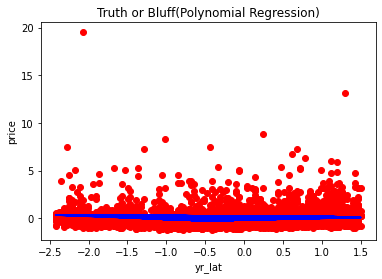

In [148]:
plt.scatter(x_test_yr_lat, y_test_yr_lat, color = "red")
plt.plot(x_test_yr_lat, x_poly_pred, color = "blue")
plt.title("Truth or Bluff(Polynomial Regression)")
plt.xlabel("yr_lat")
plt.ylabel("price")
plt.show()

# I realized that both Polynomial and Linear reagressions can not be used for scatter plot.